In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Імпорт даних

In [166]:
path = 'D:\\uni\\2курс\ПЗМН\ML_labs\lin_reg_task\Student_performance_data.csv'
dataset = pd.read_csv(path)
dataset.GradeClass = dataset.GradeClass.astype('int')
dataset.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


Перевірка даних на NaN

In [167]:
dataset.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Створення окремого DataFrame, який я використовуватиму

In [168]:
df = dataset[['StudentID', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'GradeClass']]
df.head()

,StudentID,ParentalEducation,StudyTimeWeekly,Absences,GradeClass
0,1001,2,19.833723,7,2
1,1002,1,15.408756,0,1
2,1003,3,4.210570,26,4
3,1004,3,10.028829,14,3
4,1005,2,4.672495,17,4


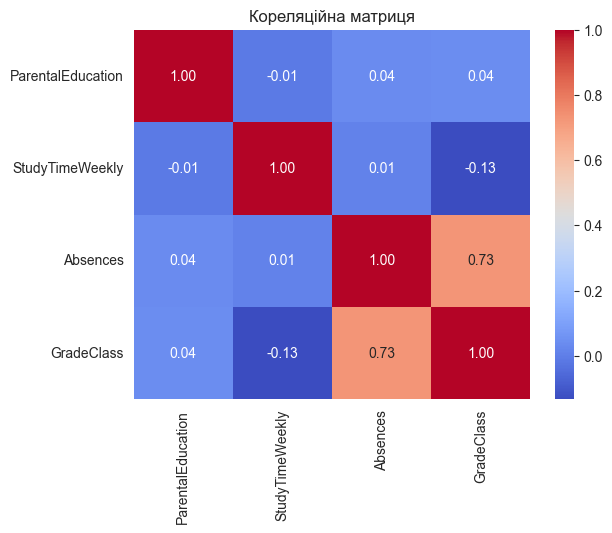

In [169]:
corr_matrix = df[['ParentalEducation', 'StudyTimeWeekly', 'Absences', 'GradeClass']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()

In [170]:
X = df[['StudyTimeWeekly', 'Absences']]
Y = df['GradeClass']

Нормалізація даних

In [171]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.78033552, -0.89082237],
       [ 0.99737625, -1.71769358],
       [-0.98404514,  1.35354235],
       ...,
       [-0.52489493,  0.64479559],
       [ 0.46794965,  0.29042222],
       [ 1.42400846, -0.18207562]])

Прогнозування оцінок за відвідуванням та годинами навчання протягом тижня за допомогою лінійної регресії

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=11)

In [173]:
X_train.shape

(1794, 2)

In [174]:
X_test.shape

(598, 2)

In [175]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [176]:
lin_reg.coef_

array([-0.16998025,  0.89871365])

In [177]:
lin_reg.intercept_

np.float64(2.9775243452068154)

In [178]:
predicted = lin_reg.predict(X_test)
expected = Y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 1.76, expected: 2.00
predicted: 2.37, expected: 2.00
predicted: 4.80, expected: 1.00
predicted: 3.70, expected: 4.00
predicted: 3.09, expected: 4.00
predicted: 3.10, expected: 4.00
predicted: 2.04, expected: 2.00
predicted: 2.58, expected: 3.00
predicted: 3.46, expected: 4.00
predicted: 3.66, expected: 4.00
predicted: 3.14, expected: 3.00
predicted: 3.07, expected: 2.00
predicted: 3.90, expected: 4.00
predicted: 2.72, expected: 3.00
predicted: 3.73, expected: 4.00
predicted: 3.02, expected: 4.00
predicted: 3.47, expected: 4.00
predicted: 2.16, expected: 2.00
predicted: 2.57, expected: 3.00
predicted: 2.88, expected: 4.00
predicted: 4.56, expected: 4.00
predicted: 2.24, expected: 2.00
predicted: 2.74, expected: 3.00
predicted: 3.59, expected: 4.00
predicted: 1.97, expected: 2.00
predicted: 3.65, expected: 4.00
predicted: 4.16, expected: 4.00
predicted: 2.82, expected: 3.00
predicted: 2.80, expected: 4.00
predicted: 3.90, expected: 4.00
predicted: 2.63, expected: 3.00
predicte

Обчислення середньоквадратичної похибки

In [179]:
mean_squared_error(Y_test, predicted)

0.6843341307914819

Обчислення R^2

In [180]:
r2_score(Y_test, predicted)

0.5471021747117446

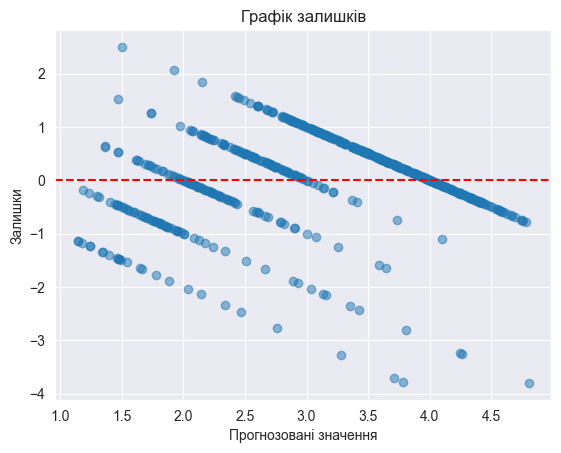

In [181]:
residuals = Y_test - predicted
plt.scatter(predicted, residuals, alpha=0.5)
plt.xlabel('Прогнозовані значення')
plt.ylabel('Залишки')
plt.title('Графік залишків')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

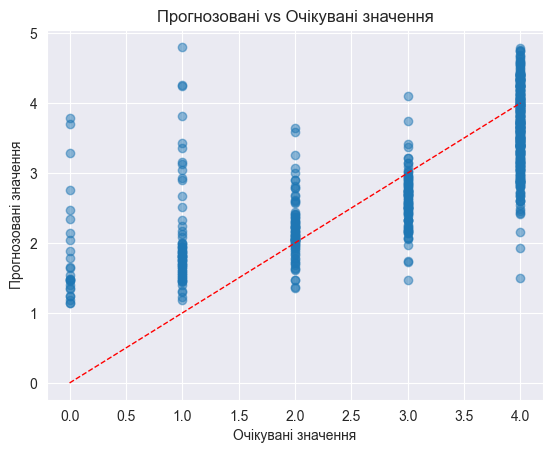

In [182]:
plt.scatter(Y_test, predicted, alpha=0.5)
plt.xlabel('Очікувані значення')
plt.ylabel('Прогнозовані значення')
plt.title('Прогнозовані vs Очікувані значення')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=1)
plt.show()

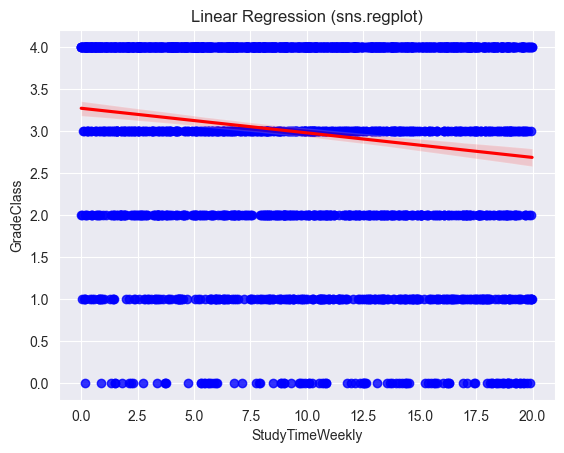

In [183]:
axes = sns.regplot(x=df.StudyTimeWeekly, y=df.GradeClass, data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Linear Regression (sns.regplot)")
plt.show()

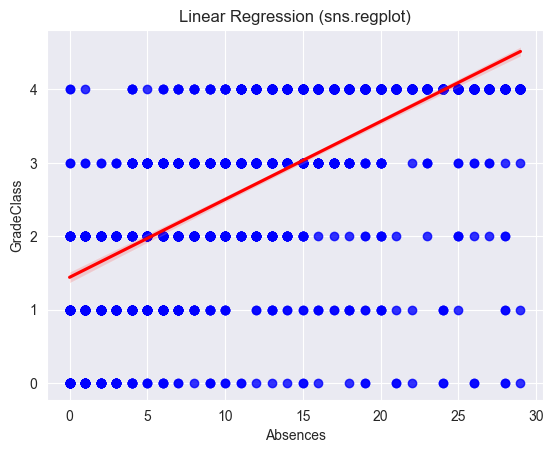

In [184]:
axes = sns.regplot(x=df.Absences, y=df.GradeClass, data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Linear Regression (sns.regplot)")
plt.show()

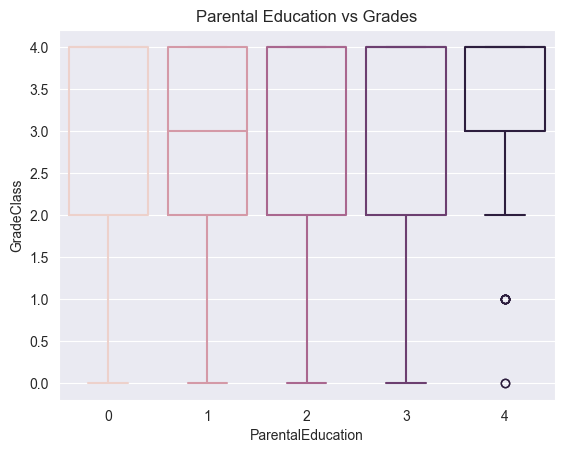

In [185]:
axes = sns.boxplot(x=df.ParentalEducation, y=df.GradeClass, data=df, hue=df.ParentalEducation, fill=False, legend=False)
plt.title("Parental Education vs Grades")
plt.show()

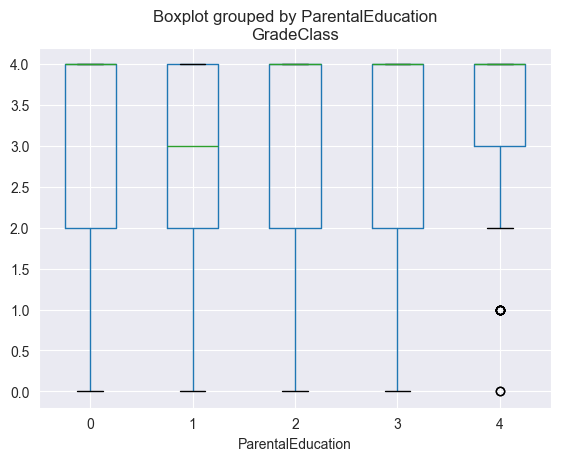

In [186]:
axes = df.boxplot(column=['GradeClass'], by='ParentalEducation')

C:\Users\User\AppData\Local\Temp\ipykernel_18952\908554025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ParentalEducation = df.ParentalEducation.astype('category')


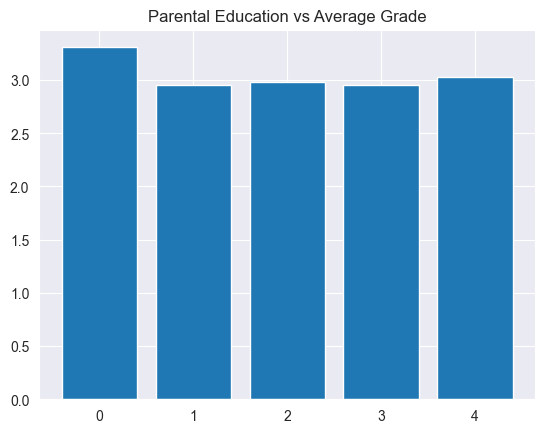

In [187]:
df.ParentalEducation = df.ParentalEducation.astype('category')
grade_mean = df.groupby('ParentalEducation', observed=True)['GradeClass'].mean()
plt.bar(x=df['ParentalEducation'].unique(), height=grade_mean)
plt.title('Parental Education vs Average Grade')
plt.show()

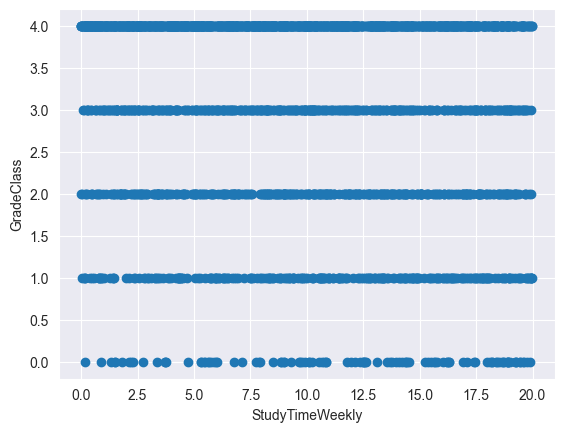

In [193]:
plt.scatter(df.StudyTimeWeekly, df.GradeClass)
plt.xlabel('StudyTimeWeekly')
plt.ylabel('GradeClass')
plt.show()

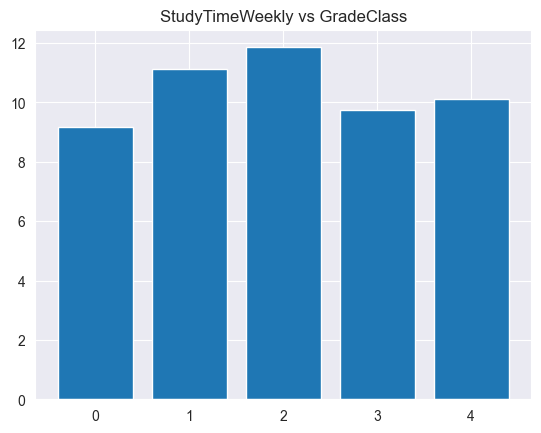

In [195]:
time_mean = df.groupby('GradeClass', observed=True)['StudyTimeWeekly'].mean()
plt.bar(x=df['GradeClass'].unique(), height=time_mean)
plt.title('StudyTimeWeekly vs GradeClass')
plt.show()

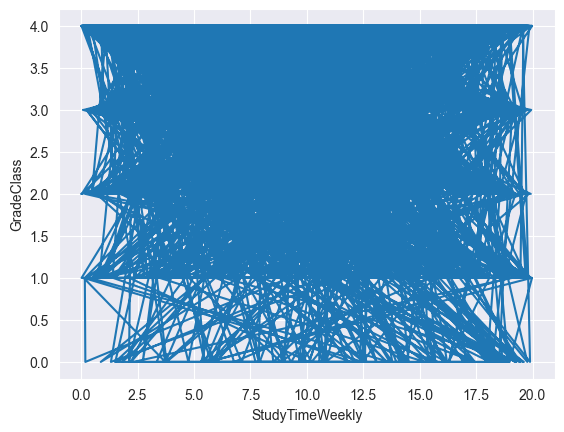

In [194]:
plt.plot(df.StudyTimeWeekly, df.GradeClass)
plt.xlabel('StudyTimeWeekly')
plt.ylabel('GradeClass')
plt.show()